# Final Project Notebook

### Amber Greer and Ashlyn Mcconaha

#### University of Arizona - APCV-361 

#### Professor Li Xu


-------------------------------------------------------------------------------------------------------------------------------

                                 Socioeconomic Factors and Health Outcomes

Research Question: “How do socioeconomic factors such as income, education, and employment affect health outcomes such as premature death rates and overall health quality in counties?”

-------------------------------------------------------------------------------------------------------------------------------

## Summary

For our project we determined that income, education, and employment status were the variables we wanted to evaluate. 
By evaluating these variables in conjunction with quality-of-life variables such as poor or fair health, poor physical health days, poor mental health days, and low birthweight and/or length of life variables such as premature death (years of potential life lost before age 75) it would paint a robust picture of any correlations in those areas. 
The social economic factors and health outcomes that we have chosen will give us a variety of different results and We will be evaluating across three different areas New York, Texas and California. 

-------------------------------------------------------------------------------------------------------------------------------

### Methodology/algorithm

#### Data Source and Collection

Source of Data:
Our analysis is based on data obtained from the County Health Rankings & Roadmaps program, which is a collaboration between the Robert Wood Johnson Foundation and the University of Wisconsin Population Health Institute.

Nature of the Data:
The dataset provides a comprehensive overview of health outcomes and health factors for nearly every county in the United States. It encompasses a wide range of measures that include variables related to:

Health Outcomes: Such as quality of life, length of life, and specific health behaviors.
Health Factors: Covering a broad spectrum, from socioeconomic factors like income, education, and employment, to environmental factors and access to healthcare.
The dataset is particularly valuable for public health research as it encapsulates various determinants of health in a geographically granular manner, allowing for county-level analysis.

Data Accessibility:
The data is publicly accessible and can be downloaded from the County Health Rankings & Roadmaps website. Specifically, the data used in our project can be found in the Rankings Data section of their site:

County Health Rankings & Roadmaps - Rankings Data Documentation

Data Collection Method:
The data was downloaded as an Excel file directly from the above-mentioned webpage. The dataset is provided in a format that is conducive to comprehensive analysis, with each row representing a county and columns representing various health indicators.

Initial Data Inspection:
Upon initial inspection, the dataset includes numerous variables, ranging from demographic data to detailed health metrics. Here is a glimpse of the first few rows of the dataset:

In [23]:
# Code to display the first few rows of the dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('analytic_data2023_0.csv', low_memory=False)

# Display the first five rows of the dataset
data.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature Death raw value,Premature Death numerator,Premature Death denominator,...,% Female raw value,% Female numerator,% Female denominator,% Female CI low,% Female CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
1,00,000,00000,US,United States,2023,NaN,7281.9355638,4125218,917267406,...,0.5047067187,167509003,331893745,NaN,NaN,0.193,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2023,NaN,10350.071456,88086,13668498,...,0.5142542169,2591778,5039877,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2023,1,8027.3947267,836,156081,...,0.513782892,30362,59095,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2023,1,8118.3582061,3377,614143,...,0.5134771453,122872,239294,NaN,NaN,0.4227909911,77060,182265,NaN,NaN


Next Steps:
The subsequent steps will involve a detailed cleaning and preprocessing of this data to make it suitable for our analysis, which will be discussed in the next section of this notebook.

-------------------------------------------------------------------------------------------------------------------------------

#### Data Cleaning and Preparation

Our group first needed to start by preparing and cleaning our data. We started by loading our data from the 'ranked_measure_data_cumulative' csv file and gathering the needed data columns from our three selected states. We then converted the columns names to a list to better sort through the designated data to answer and support our research question. 

In [252]:
import pandas as pd
# Set option to display all columns (if there are many)
pd.set_option('display.max_columns', None)
data = pd.read_csv('ranked_measure_data_cumulative.csv', low_memory=False)

In [253]:
selected_states = ['New York', 'Texas', 'California']
filtered_data = data[data['State'].isin(selected_states)]

In [254]:
print(filtered_data['State'].unique())
#filtered_data.to_csv('ranked_measure_data_filtered.csv')

['California' 'New York' 'Texas']


In [255]:
# Convert column names to a list
column_names = filtered_data.columns.tolist()

# Now column_names is a list of all column names
print(column_names)

['Unnamed: 0', 'FIPS', 'State', 'County', 'Unreliable', 'Deaths', 'Years of Potential Life Lost Rate', '95% CI - Low', '95% CI - High', 'Quartile', 'YPLL Rate (AIAN)', 'YPLL Rate (AIAN) 95% CI - Low', 'YPLL Rate (AIAN) 95% CI - High', 'YPLL Rate (AIAN) Unreliable', 'YPLL Rate (Asian)', 'YPLL Rate (Asian) 95% CI - Low', 'YPLL Rate (Asian) 95% CI - High', 'YPLL Rate (Asian) Unreliable', 'YPLL Rate (Black)', 'YPLL Rate (Black) 95% CI - Low', 'YPLL Rate (Black) 95% CI - High', 'YPLL Rate (Black) Unreliable', 'YPLL Rate (Hispanic)', 'YPLL Rate (Hispanic) 95% CI - Low', 'YPLL Rate (Hispanic) 95% CI - High', 'YPLL Rate (Hispanic) Unreliable', 'YPLL Rate (White)', 'YPLL Rate (White) 95% CI - Low', 'YPLL Rate (White) 95% CI - High', 'YPLL Rate (White) Unreliable', '% Fair or Poor Health', '95% CI - Low.1', '95% CI - High.1', 'Quartile.1', 'Average Number of Physically Unhealthy Days', '95% CI - Low.2', '95% CI - High.2', 'Quartile.2', 'Average Number of Mentally Unhealthy Days', '95% CI - Low.3

-------------------------------------------------------------------------------------------------------------------------------

After preparing the data we wanted to display the results from our desired categories. 
This would help us better understand our information and how we can display it effectively to show correlation and other charts/graphs. 
We wanted to use a heatmap to display the results as you are able to easily determine what socioeconomic factors affect the most throughout the chosen states. 

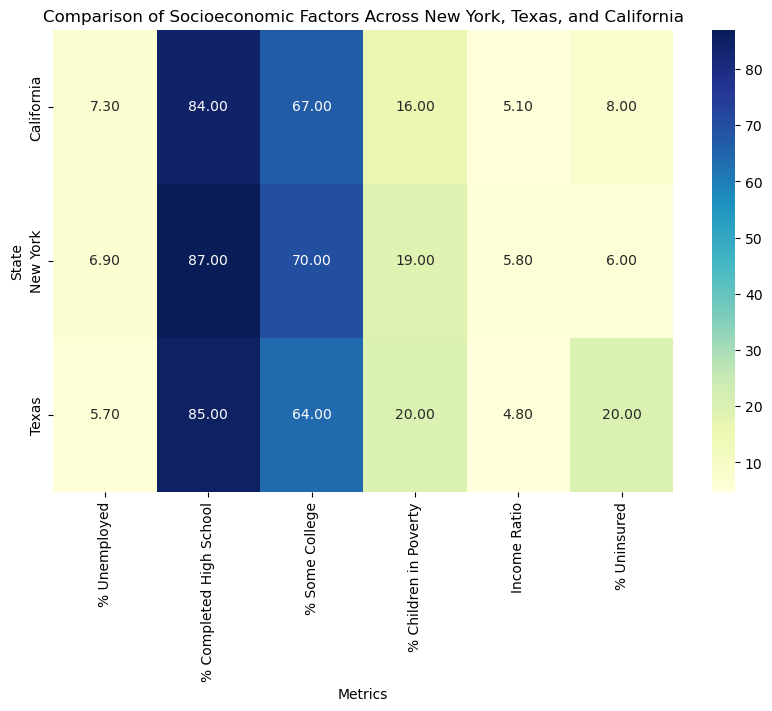

In [263]:
# Selecting relevant columns for our analysis
relevant_columns = [
    'State',
    '% Unemployed', 
    '% Completed High School', 
    '% Some College',
    "% Children in Poverty",
    'Income Ratio',  # Represents income inequality
    '% Uninsured'
]

# Filtering the data to include only relevant columns
state_level_data = filtered_data[relevant_columns]

# Setting the index to 'State' for better plotting
state_level_data.set_index('State', inplace=True)

# Plotting the data for comparison using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(state_level_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Comparison of Socioeconomic Factors Across New York, Texas, and California')
plt.ylabel('State')
plt.xlabel('Metrics')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

Our group wanted to consider additional socioeconomic factors that affect health outcomes, we chose to filter additional data for the required states to see different outcomes. 

In [265]:
# Filtering data for the required states and metrics
birth_smoking_filtered_data = filtered_data[filtered_data['State'].isin(states)][['State', '% Low Birthweight', '% Adults Reporting Currently Smoking']].dropna()
print(birth_smoking_filtered_data)

# Aggregating the data at the state level
birth_smoking_state_aggregated_data = birth_smoking_filtered_data.groupby('State').mean()

        State  % Low Birthweight  % Adults Reporting Currently Smoking
0  California                  7                                     9
1    New York                  8                                    12
2       Texas                  8                                    13


-------------------------------------------------------------------------------------------------------------------------------

### Results

**Exploratory Data Analysis (EDA)**

Our dataset gave us several health factors and outcomes to choose from. Our group wanted to start by observing the replationship between Low Birthweight and Adults Currently Smoking. As displayed by the results we can see that the higher the percentage of adults who smoke resulted in a higher percentage of lower birthweight. This is just one example of a socioeconomic factor and how it can possibly affect health outcomes.

<Figure size 1000x600 with 0 Axes>

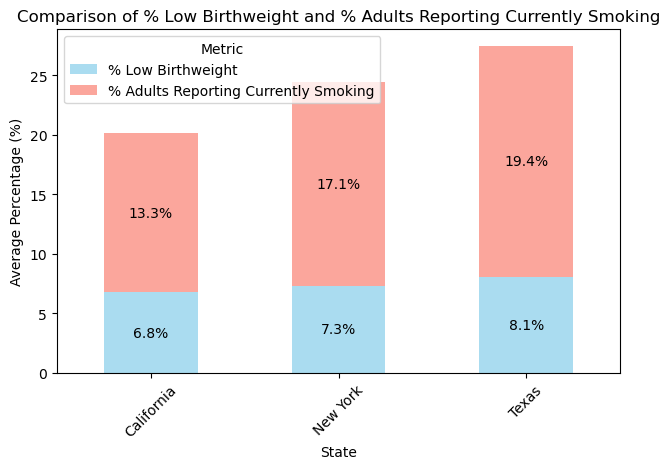

In [266]:
import matplotlib.pyplot as plt

# Plotting the stacked bar graph with percentages displayed as text
plt.figure(figsize=(10, 6))
ax = state_aggregated_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], alpha=0.7)

# Adding text annotations for each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only display if the height is greater than 0
        ax.text(x + width/2, 
                y + height/2, 
                '{:.1f}%'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
        
plt.title('Comparison of % Low Birthweight and % Adults Reporting Currently Smoking')
plt.ylabel('Average Percentage (%)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

plt.show()

--------------------------------------------------------------------------------------------------------------------------------

**Correlation Analysis**

The following visualizations will assist us in answering our research question on how socioeconomic factors such as income, education, and employment will affect health outcomes. 

Starting with Income, we will determine how this factor has either positively or negatively impacted whether or not a person obtains insurance coverage. 

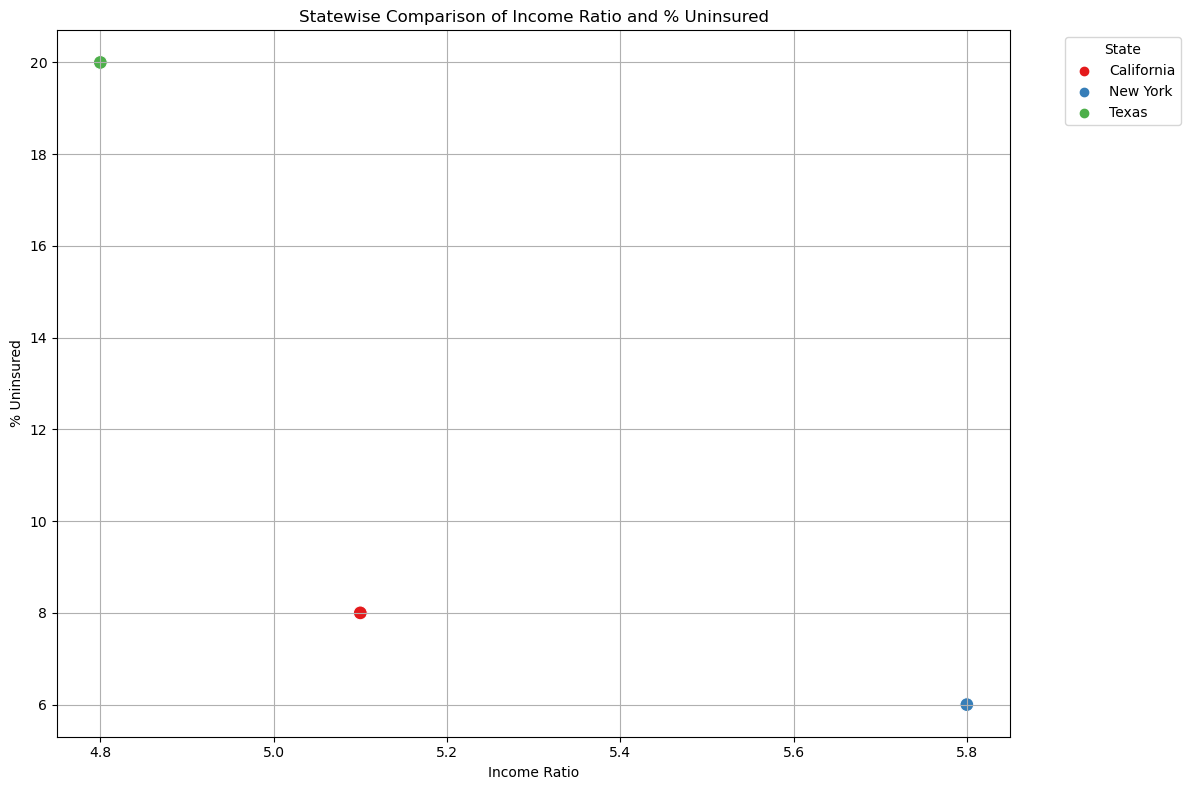

In [267]:
# Import seaborn
import seaborn as sns

# Filtering the dataset for "Income Ratio" and "% Uninsured" for each state
statewise_income_uninsured_data = filtered_data[['State', 'Income Ratio', '% Uninsured']].dropna()

# Aggregating the data at the state level
statewise_aggregated_income_uninsured = statewise_income_uninsured_data.groupby('State').mean()

# Plotting the scatter plot for statewise comparison with more distinguishable colors
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income Ratio', y='% Uninsured', data=statewise_aggregated_income_uninsured, 
                hue='State', palette='Set1', s=100)
plt.title('Statewise Comparison of Income Ratio and % Uninsured')
plt.xlabel('Income Ratio')
plt.ylabel('% Uninsured')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

We will then move to Unemployment and School Status. These factors can affect the populations access to healthcare as they are more reluctant to seek medical assistance if it is not readily available to them. 

By determining access to insurance coverage we will see how this has affected the health outcomes.

In [268]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Reload the data
file_path_data = 'ranked_measure_data_filtered.csv'
data = pd.read_csv(file_path_data)

# Final list of selected columns for cluster analysis
final_selected_columns = [
    '% Fair or Poor Health',
    'Average Number of Physically Unhealthy Days',
    'Average Number of Mentally Unhealthy Days',
    '% Uninsured',
    '% Some College',
    '% Children in Poverty',
    'Income Ratio'
]

# Filtering the data for the final selected columns
final_filtered_data = data[final_selected_columns]

# Imputing missing data using the median of each column
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(final_filtered_data)

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(imputed_data)

# Applying K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(normalized_data)

# Adding the cluster labels to the original dataset for analysis
final_filtered_data['Cluster'] = clusters

# Displaying the first few rows of the dataset with cluster labels
final_filtered_data.head()


C:\Users\dwarf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dwarf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\1035093132.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_filtered_data['Cluster'] = clusters


,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Uninsured,% Some College,% Children in Poverty,Income Ratio,Cluster
0,14.0,3.0,4.0,8.0,67,16.0,5.1,2
1,12.0,2.6,4.5,5.0,78,10.0,5.2,2
2,13.0,3.2,4.9,11.0,53,27.0,4.4,2
3,13.0,3.2,4.9,6.0,55,14.0,4.4,2
4,15.0,3.5,5.2,7.0,70,18.0,5.4,2


We wanted to observe the correlation that comes with clustering, so we decided to see what impact the percentage of children living in poverty had with the percentage of fair or poor health. We can see that there are three major clusters based on the location that the population of children reside in. 

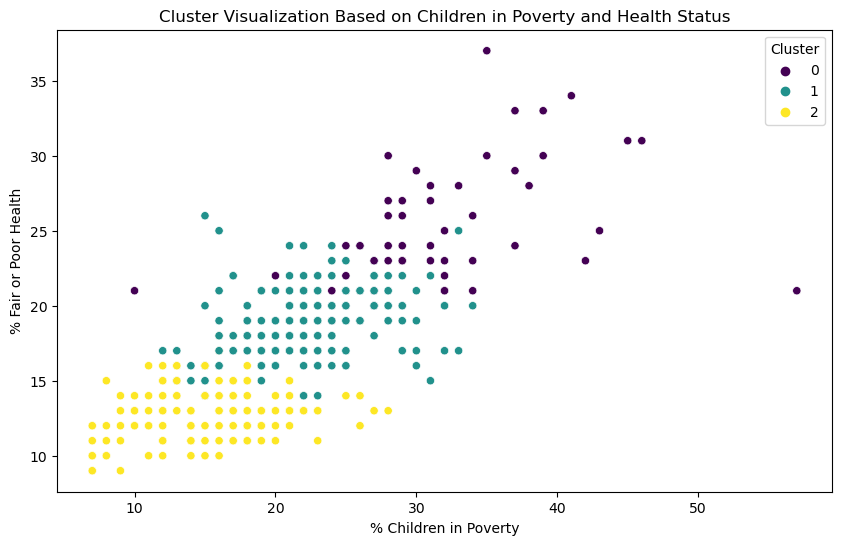

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_filtered_data' is your DataFrame with the cluster assignments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% Children in Poverty', y='% Fair or Poor Health', 
                hue='Cluster', data=final_filtered_data, palette='viridis')
plt.title('Cluster Visualization Based on Children in Poverty and Health Status')
plt.xlabel('% Children in Poverty')
plt.ylabel('% Fair or Poor Health')
plt.legend(title='Cluster')
plt.show()


After performing clustering on the graph above, we wanted to include a dataframe with a table of the states/counties represented in the legend.

In [247]:
import pandas as pd

# Assuming 'data' is your DataFrame with county names and 'clusters' is the array of cluster labels
data['Cluster'] = clusters

# Create an empty DataFrame for the table
cluster_table = pd.DataFrame(columns=['Cluster', 'Counties'])

# Populate the DataFrame with the list of counties for each cluster
for cluster_num in range(kmeans.n_clusters):
    counties_in_cluster = data[data['Cluster'] == cluster_num]['County'].tolist()
    cluster_table = cluster_table.append({'Cluster': cluster_num, 'Counties': counties_in_cluster}, ignore_index=True)

# Display the table
print(cluster_table)


  Cluster                                           Counties
0       0  [Bronx, Bee, Briscoe, Brooks, Cameron, Cochran...
1       1  [Colusa, Del Norte, Fresno, Glenn, Humboldt, I...
2       2  [nan, Alameda, Alpine, Amador, Butte, Calavera...


C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\2756072459.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_table = cluster_table.append({'Cluster': cluster_num, 'Counties': counties_in_cluster}, ignore_index=True)
C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\2756072459.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_table = cluster_table.append({'Cluster': cluster_num, 'Counties': counties_in_cluster}, ignore_index=True)
C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\2756072459.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_table = cluster_table.append({'Cluster': cluster_num, 'Counties': counties_in_cluster}, ignore_index=True)


In [ ]:
Kmeans Clusters Profiles

In [248]:
# Assuming 'clusters' is the array of cluster labels from the K-means algorithm
# and 'data' is your DataFrame that includes the county data

# Add the cluster labels to your DataFrame
data['Cluster'] = clusters

# Verify that the 'Cluster' column has been added
print(data.columns)

# Then proceed with the analysis
cluster_profiles = pd.DataFrame()

for cluster_num in range(kmeans.n_clusters):
    # Filter data for each cluster
    cluster_data = data[data['Cluster'] == cluster_num]

    # Calculate descriptive statistics
    profile = cluster_data.describe().transpose()

    # Add a column to denote the cluster
    profile['Cluster'] = cluster_num

    # Append to the cluster_profiles DataFrame
    cluster_profiles = cluster_profiles.append(profile)

# Display the cluster profiles
print(cluster_profiles)


Index(['Unnamed: 0', 'FIPS', 'State', 'County', 'Unreliable', 'Deaths',
       'Years of Potential Life Lost Rate', '95% CI - Low', '95% CI - High',
       'Quartile',
       ...
       '% Drive Alone (Hispanic) 95% CI - High', '% Drive Alone (White)',
       '% Drive Alone (White) 95% CI - Low',
       '% Drive Alone (White) 95% CI - High', '# Workers who Drive Alone',
       '% Long Commute - Drives Alone', '95% CI - Low.19', '95% CI - High.19',
       'Quartile.33', 'Cluster'],
      dtype='object', length=248)


C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\3149537202.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_profiles = cluster_profiles.append(profile)
C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\3149537202.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_profiles = cluster_profiles.append(profile)


                                   count          mean          std      min  \
Unnamed: 0                          49.0   2682.938776   139.013999   1863.0   
FIPS                                49.0  48016.795918  1757.450201  36005.0   
Deaths                              40.0   1188.275000  3206.157185     65.0   
Years of Potential Life Lost Rate   40.0   9441.075000  1753.497873   5713.0   
95% CI - Low                        40.0   7832.150000  1499.191347   3796.0   
...                                  ...           ...          ...      ...   
% Long Commute - Drives Alone      130.0     37.246154    11.941759     10.0   
95% CI - Low.19                    130.0     33.292308    12.971911      0.0   
95% CI - High.19                   130.0     41.553846    13.923969     17.0   
Quartile.33                        123.0      2.756098     1.154758      1.0   
Cluster                            130.0      2.000000     0.000000      2.0   

                                       

C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\3149537202.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_profiles = cluster_profiles.append(profile)


In [249]:
# Assuming 'data' is your DataFrame with cluster labels and county data
cluster_profiles = pd.DataFrame()

for cluster_num in range(kmeans.n_clusters):
    # Filter data for each cluster
    cluster_data = data[data['Cluster'] == cluster_num]

    # Calculate descriptive statistics
    profile = cluster_data.describe().transpose()

    # Add a column to denote the cluster
    profile['Cluster'] = cluster_num

    # Append to the cluster_profiles DataFrame
    cluster_profiles = cluster_profiles.append(profile)

# Display the cluster profiles
print(cluster_profiles)


C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\1458973941.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_profiles = cluster_profiles.append(profile)
C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\1458973941.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_profiles = cluster_profiles.append(profile)


                                   count          mean          std      min  \
Unnamed: 0                          49.0   2682.938776   139.013999   1863.0   
FIPS                                49.0  48016.795918  1757.450201  36005.0   
Deaths                              40.0   1188.275000  3206.157185     65.0   
Years of Potential Life Lost Rate   40.0   9441.075000  1753.497873   5713.0   
95% CI - Low                        40.0   7832.150000  1499.191347   3796.0   
...                                  ...           ...          ...      ...   
% Long Commute - Drives Alone      130.0     37.246154    11.941759     10.0   
95% CI - Low.19                    130.0     33.292308    12.971911      0.0   
95% CI - High.19                   130.0     41.553846    13.923969     17.0   
Quartile.33                        123.0      2.756098     1.154758      1.0   
Cluster                            130.0      2.000000     0.000000      2.0   

                                       

C:\Users\dwarf\AppData\Local\Temp\ipykernel_20148\1458973941.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_profiles = cluster_profiles.append(profile)


-------------------------------------------------------------------------------------------------------------------------------

### Conclusion

We have determined that there are several socioeconomic factors that affect many possible health outcomes. These factors also affect the populations access to healthcare which can also affect health outcomes. The statistics change yearly, this is important for our project as we will be able to see what changes affect our data. 

-------------------------------------------------------------------------------------------------------------------------------

### **References**

“Explore Health Rankings: 2023 Measures.” County Health Rankings & Roadmaps, www.countyhealthrankings.org/explore-health-rankings/county-health-rankings-measures. Accessed 26 Oct. 2023.

“Explore Health Rankings: County Health Rankings Model.” County Health Rankings & Roadmaps, www.countyhealthrankings.org/explore-health-rankings/county-health-rankings-model. Accessed 26 Oct. 2023.

“Explore Health Rankings: Rankings Data & Documentation.” County Health Rankings & Roadmaps, www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation. Accessed 22 Oct. 2023.

Ratan SK, Anand T, Ratan J. “Formulation of Research Question - Stepwise Approach.” J Indian Assoc Pediatr Surg. 2019 Jan-Mar; 24(1):15-20. Accessed 24 Oct. 2023